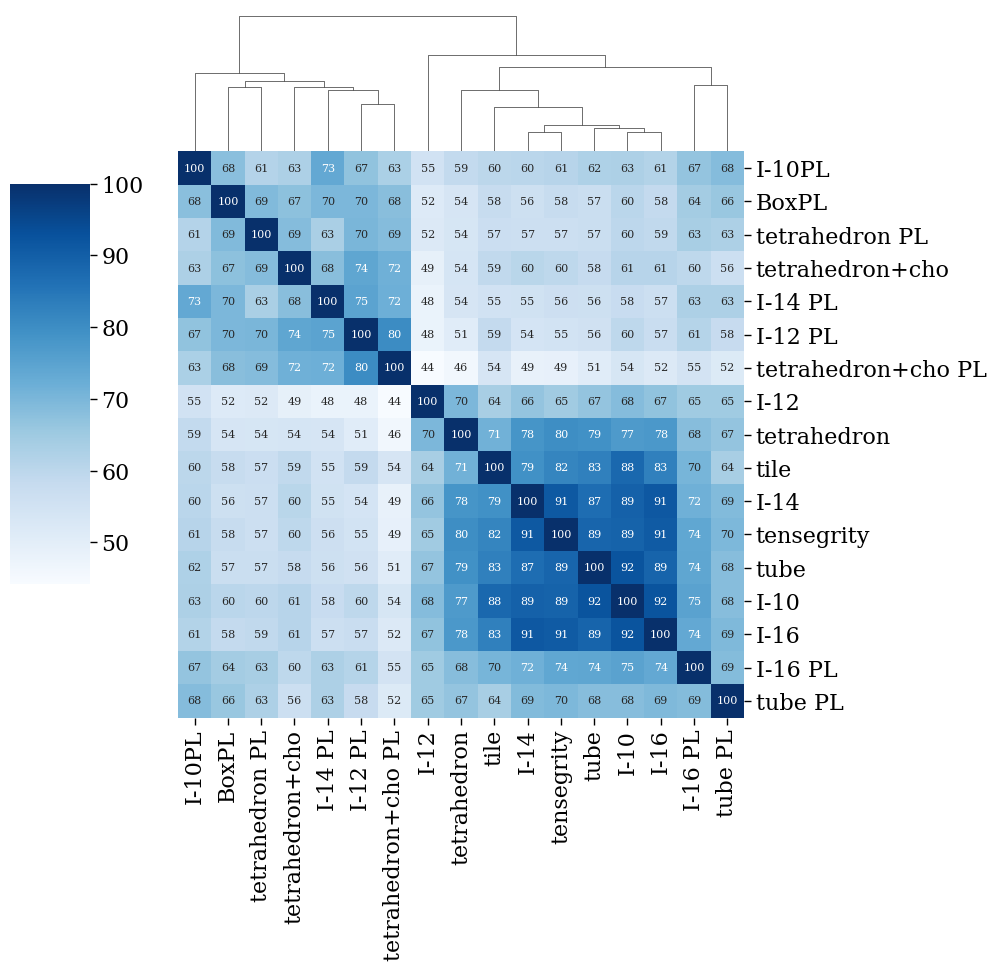

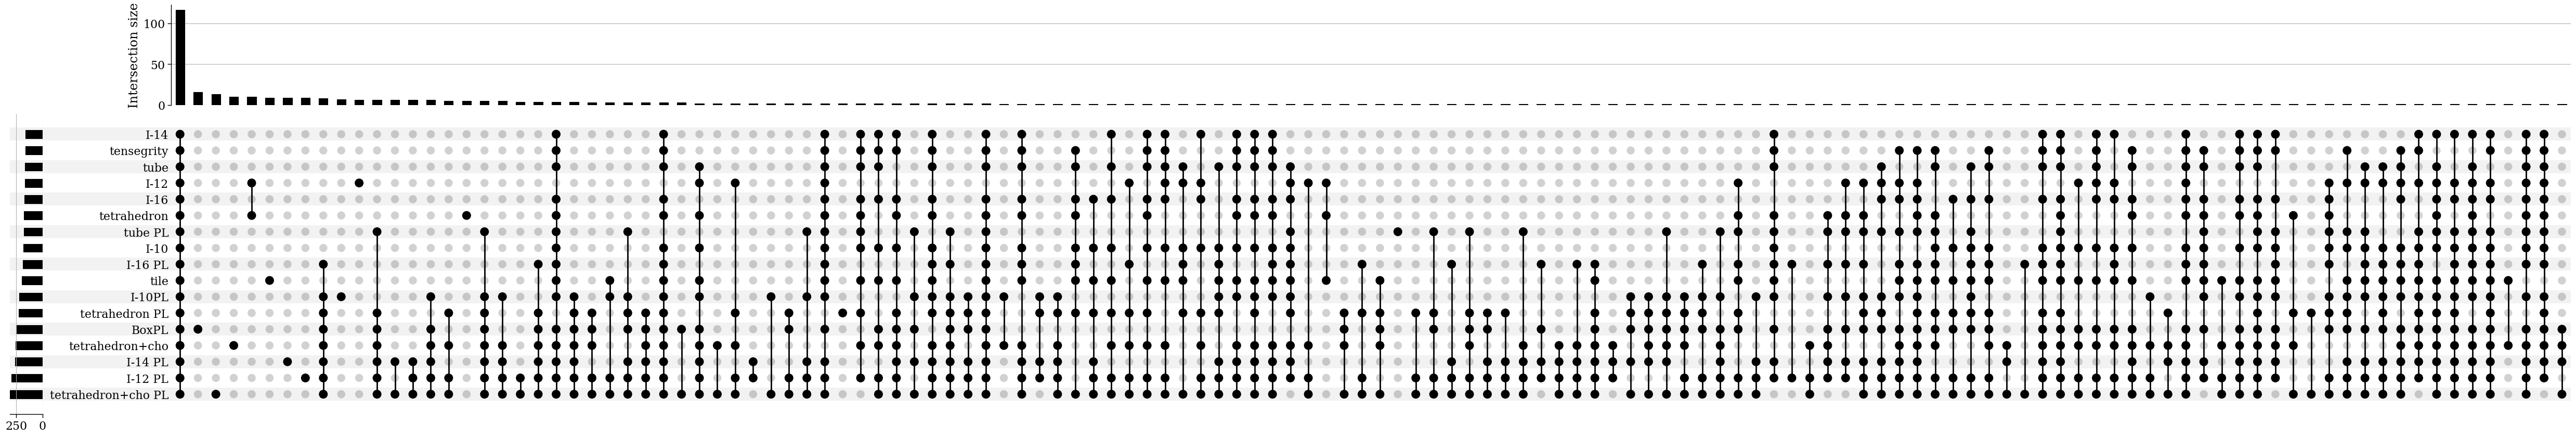

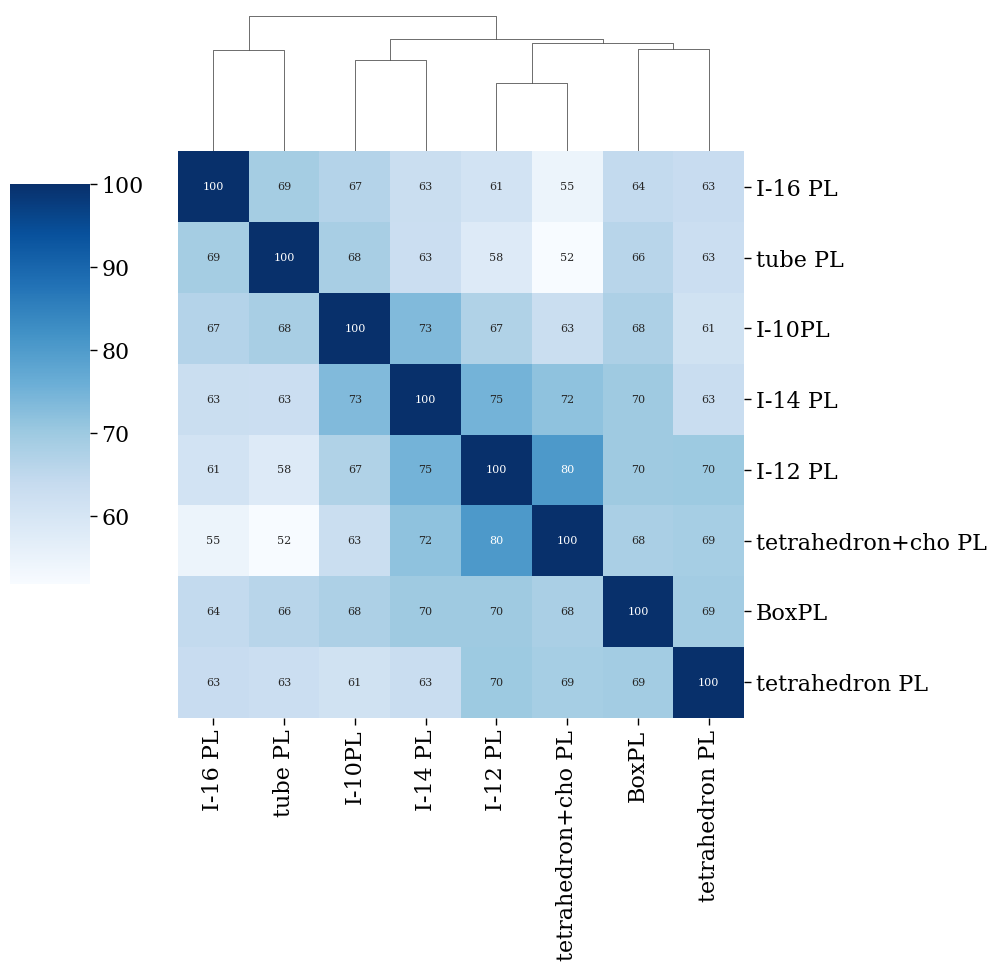

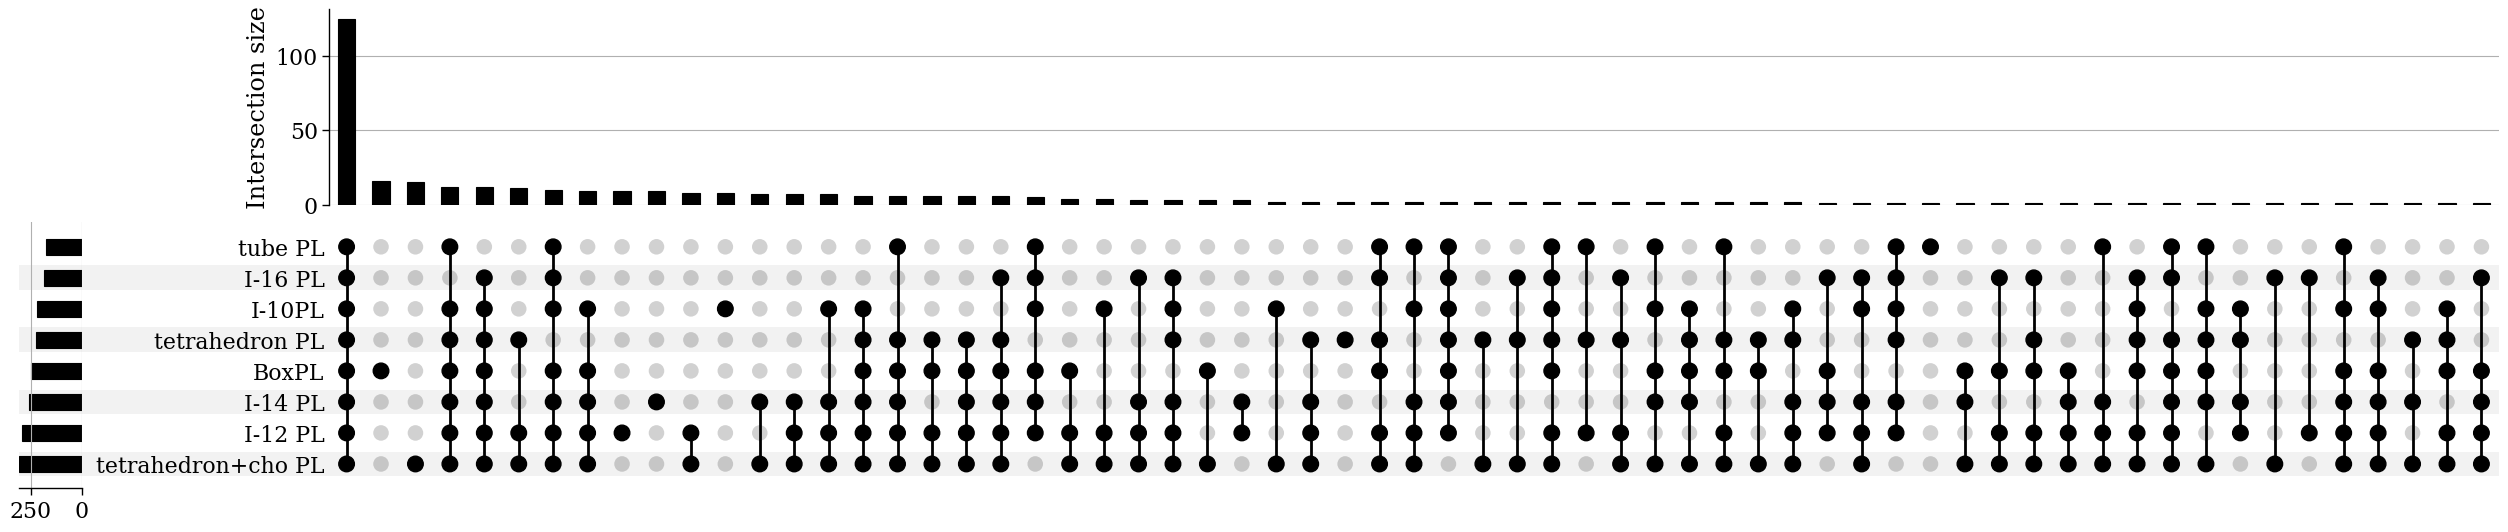

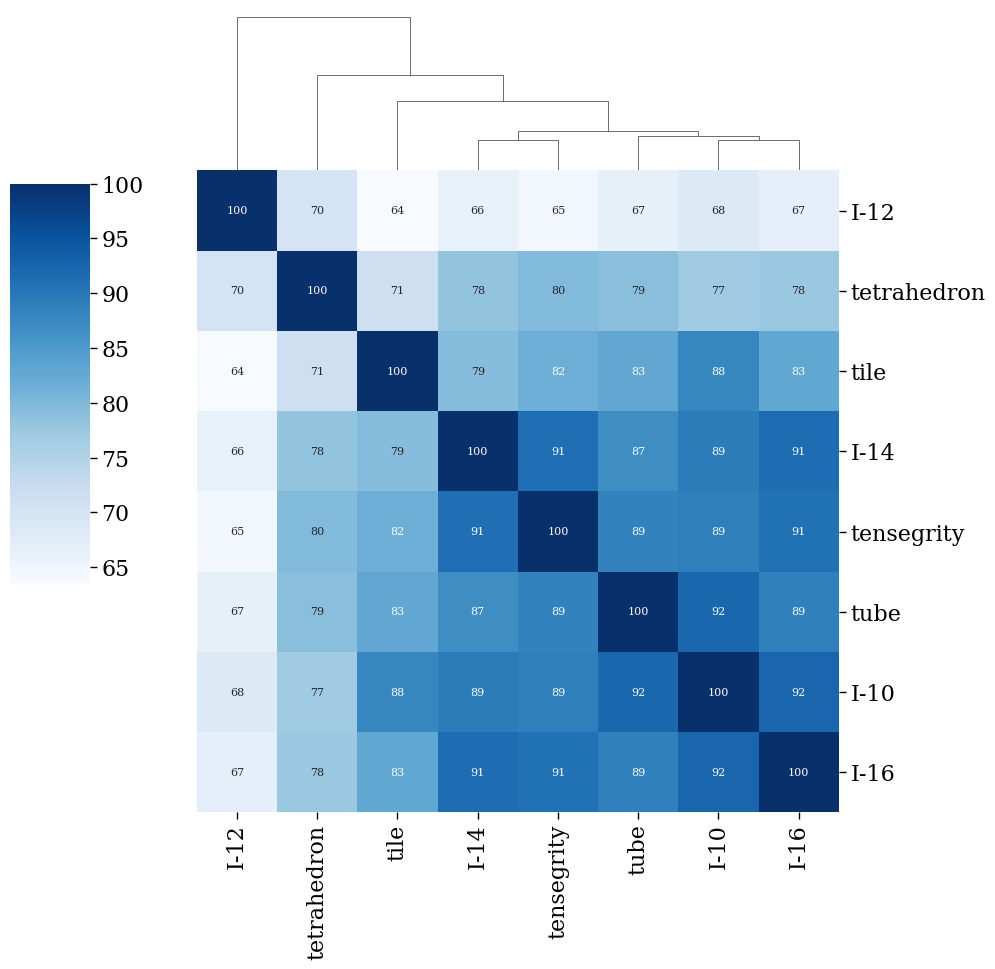

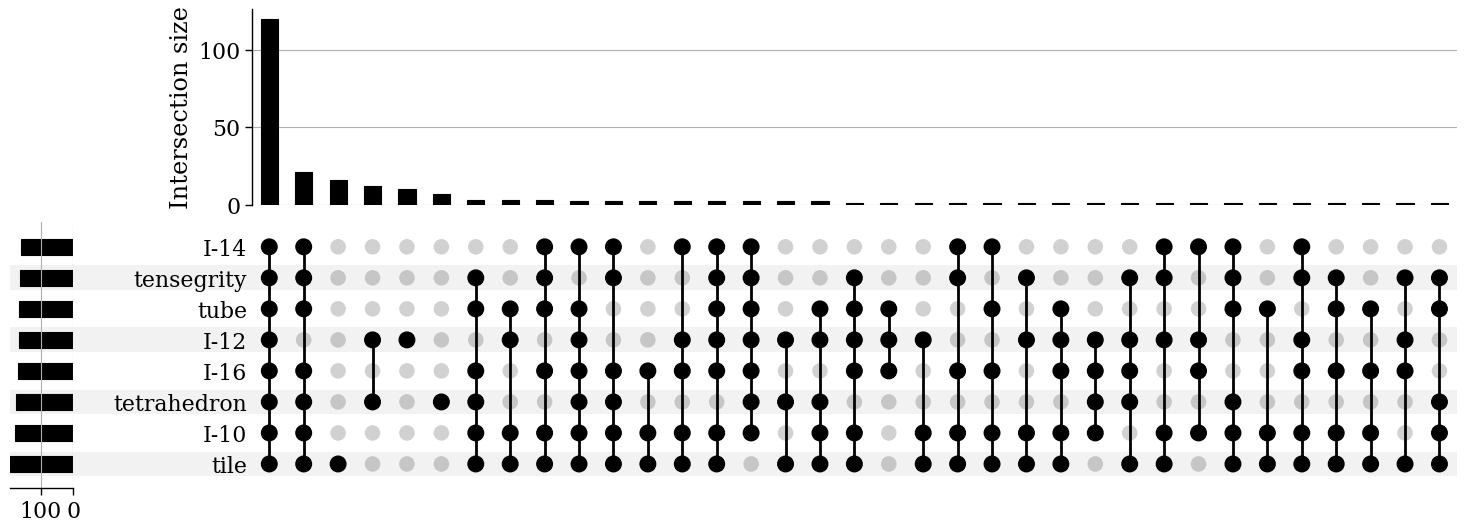

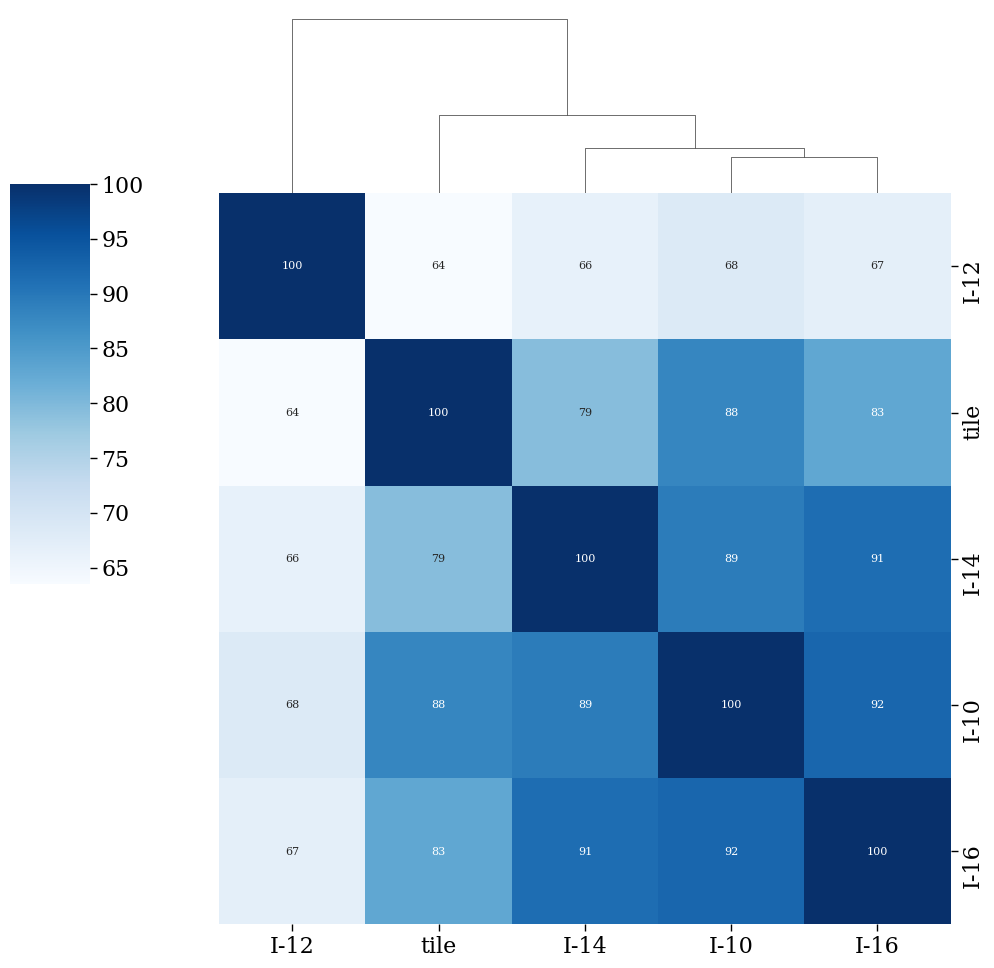

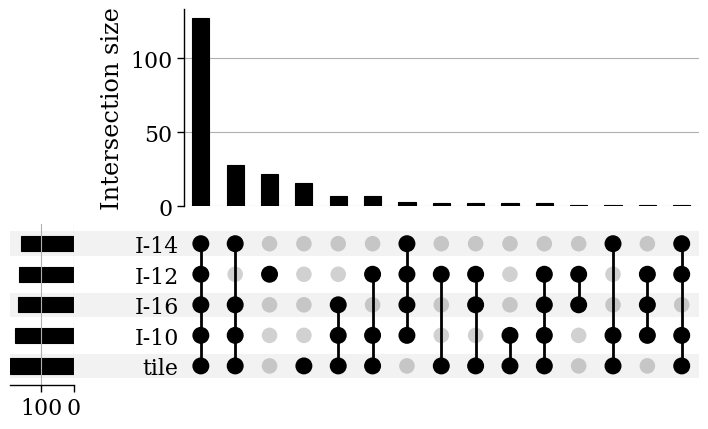

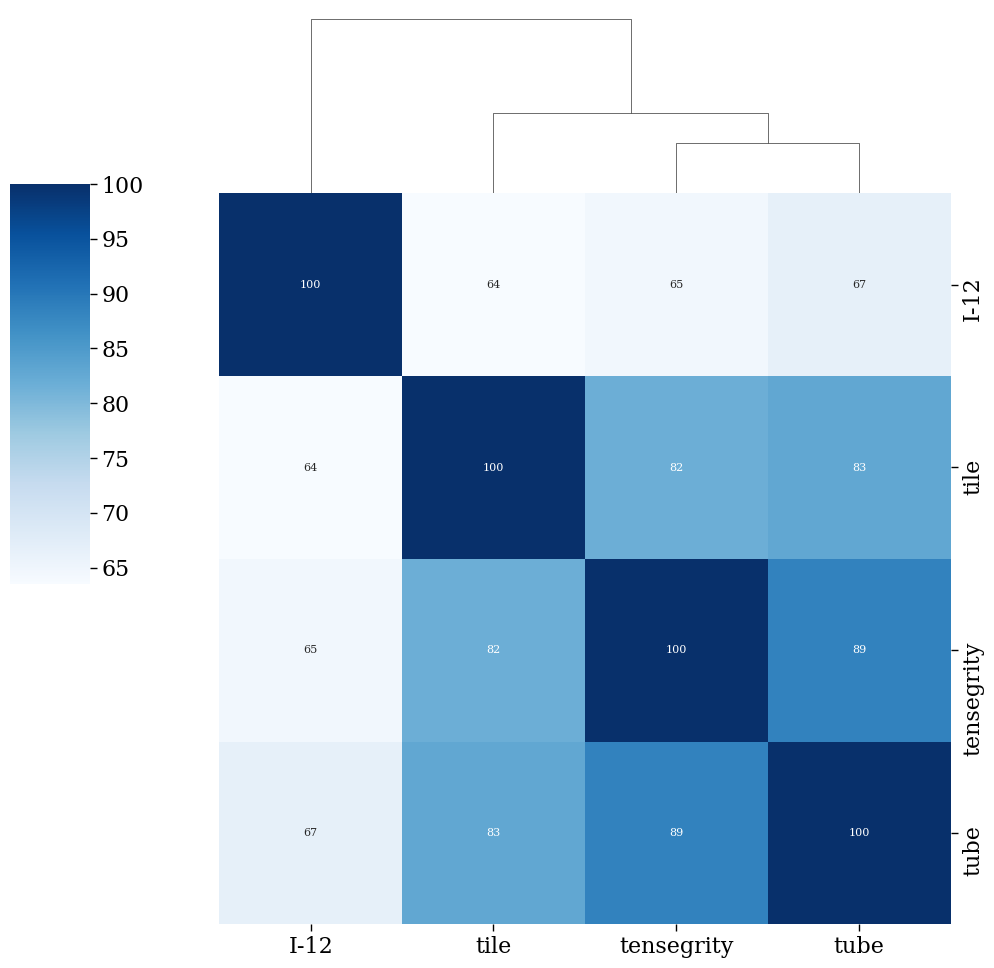

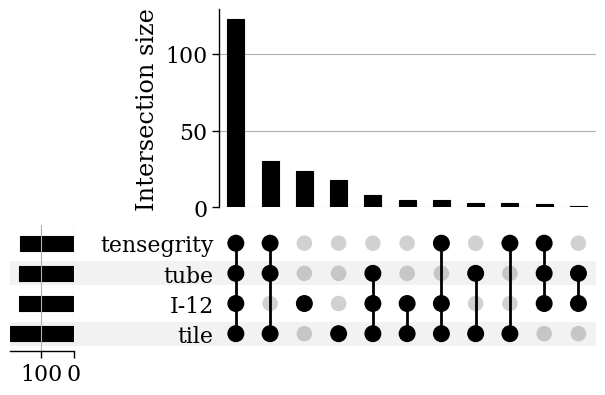

In [4]:
import pandas as pd
import upsetplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

inputDir = 'AnalyzedDataTest\\'
data=pd.read_csv("C:\\Users\\jared\\DNANano_ProteinCorona_ML\\AnalyzedDataTest\\overallResPresent8_6.csv")


def commonProteins(listPros,overallRes3):
    allPros = np.unique(overallRes3['ID'])
    setNames = list()
    listSets = list()
    #for c in np.unique(overallRes3['Sample']):
    #for c in ['tube','tile','tensegrity','I-12']:
    #for c in ['tube','tile','tensegrity','I-12']:
    for c in listPros:
        subRes = overallRes3[overallRes3['Sample'] == c]
        subRes = subRes[subRes['Abundance'] == 1]
        listSets.append(set(subRes['ID']))
        setNames.append(c)

    setNums=pd.DataFrame([[e in setA for setA in listSets] for e in allPros], columns = setNames)

    yVals = list()
    xVals = list()
    resVals = list()
    for y in range(len(listSets)):
        for x in range(len(listSets)):
            if(x == y):
                resVals.append(1)
            else:
                common=listSets[x].intersection(listSets[y])
                totVals = listSets[x].union(listSets[y])
                resVals.append(len(common)/len(totVals))
            xVals.append(setNames[x])
        yVals.append(setNames[y])
        
    percentSim=pd.DataFrame(np.asarray(resVals).reshape((len(listPros),len(listPros))), index =yVals, columns = np.unique(xVals))
    percentSim = percentSim*100
    figsize=(6, 6)
    sns.set_context("paper", font_scale = 1.8)
    plt.rc('font', family='serif')
    cg = sns.clustermap(percentSim.loc[listPros,listPros], annot=True,cmap="Blues",fmt ='.0f',cbar_pos=(0, .4, .08, .4),annot_kws={"size": 8})
    cg.ax_row_dendrogram.set_visible(False)
    cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
    cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 16)
    #plt.savefig('StructureCoronaSimilarityHeatmap.png',bbox_inches='tight')

    allPros = np.unique(overallRes3['ID'])
    df = pd.DataFrame([[e in setA for setA in listSets] for e in allPros], columns = setNames)
    df=df.loc[:,listPros]
    df_up = df.value_counts()
    fig1=upsetplot.UpSet(df_up,sort_by ='cardinality', min_degree = 1)
    #plot(fig1)
    fig1.plot()
    return pd.DataFrame(df_up)


overallResPres = data[['Present', 'Sample', 'Protein']]
overallResPres=overallResPres.rename(columns={"Protein":'ID'})
overallResPres=overallResPres.rename(columns={"Present":'Abundance'})
dfAllCommon=commonProteins(np.unique(overallResPres['Sample']),overallResPres)

overallPL=overallResPres[overallResPres.Sample.str.contains("PL")]
dfAllPL=commonProteins(np.unique(overallPL['Sample']),overallPL)

overallBare=overallResPres[~ overallResPres.Sample.str.contains("PL")]
overallBare=overallBare[~ overallBare.Sample.str.contains("cho")]
dfAllBare=commonProteins(np.unique(overallBare['Sample']),overallBare)

overall2D=overallResPres.loc[overallResPres['Sample'].isin(['tile','I-10','I-12','I-14','I-16'])]
df2D=commonProteins(np.unique(overall2D['Sample']),overall2D)

overallDimensions=overallResPres.loc[overallResPres['Sample'].isin(['tube','tensegrity','tile','I-12'])]
dfDimensions=commonProteins(np.unique(overallDimensions['Sample']),overallDimensions)

In [6]:
overallRes3 = pd.read_csv("C:\\Users\\jared\\DNANano_ProteinCorona_ML\\AnalyzedDataTest\\overallResPresent8_6.csv")

In [8]:
overallRes3

,Unnamed: 0,Hydropathy,Net Charge,Aromaticity,Neutral Charge,IsoelectricPoint,LengthAminoAcids,Instability,Gravy,Molecular Weight,...,3D,Vertices,Cavities,Cholesterol,Volume,PolyL,Molecular Weight Nano,Present,Sample,Protein
0,0,-0.495923,0.276824,0.092275,-22.389349,5.090864,466.0,43.730901,-0.495923,54214.1986,...,1.0,12.0,1.0,0.0,18327.81250,1.0,4400000.0,1,BoxPL,Q15846
1,1,-0.595899,0.309148,0.050473,-4.237675,5.645613,317.0,44.884227,-0.595899,36153.6599,...,1.0,12.0,1.0,0.0,18327.81250,1.0,4400000.0,1,BoxPL,P02649
2,2,-0.198933,0.229333,0.085333,-11.704711,5.307534,375.0,37.946693,-0.198933,41792.3943,...,1.0,12.0,1.0,0.0,18327.81250,1.0,4400000.0,1,BoxPL,P63261
3,3,-0.456037,0.273994,0.063467,-12.805792,5.374718,646.0,36.887492,-0.456037,70897.2343,...,1.0,12.0,1.0,0.0,18327.81250,1.0,4400000.0,1,BoxPL,P11142
4,4,-0.242899,0.231884,0.057971,-6.038232,5.533867,345.0,43.342899,-0.242899,38363.0994,...,1.0,12.0,1.0,0.0,18327.81250,1.0,4400000.0,1,BoxPL,O76027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,9073,0.029060,0.153846,0.111111,1.472361,8.445568,117.0,29.631624,0.029060,12674.4126,...,1.0,0.0,1.0,0.0,9613.27352,1.0,4400000.0,1,tube PL,A0A0C4DH38
9074,9074,-0.270886,0.192405,0.093671,-3.588124,6.111124,395.0,45.856481,-0.270886,43805.2643,...,1.0,0.0,1.0,0.0,9613.27352,1.0,4400000.0,0,tube PL,P01859
9075,9075,-0.252408,0.216170,0.079702,-4.201600,6.655073,1744.0,45.813664,-0.252408,192783.1768,...,1.0,0.0,1.0,0.0,9613.27352,1.0,4400000.0,0,tube PL,P0C0L4
9076,9076,-0.336676,0.246418,0.088825,-1.155088,6.810869,698.0,34.939857,-0.336676,77049.0881,...,1.0,0.0,1.0,0.0,9613.27352,1.0,4400000.0,1,tube PL,P02787


{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

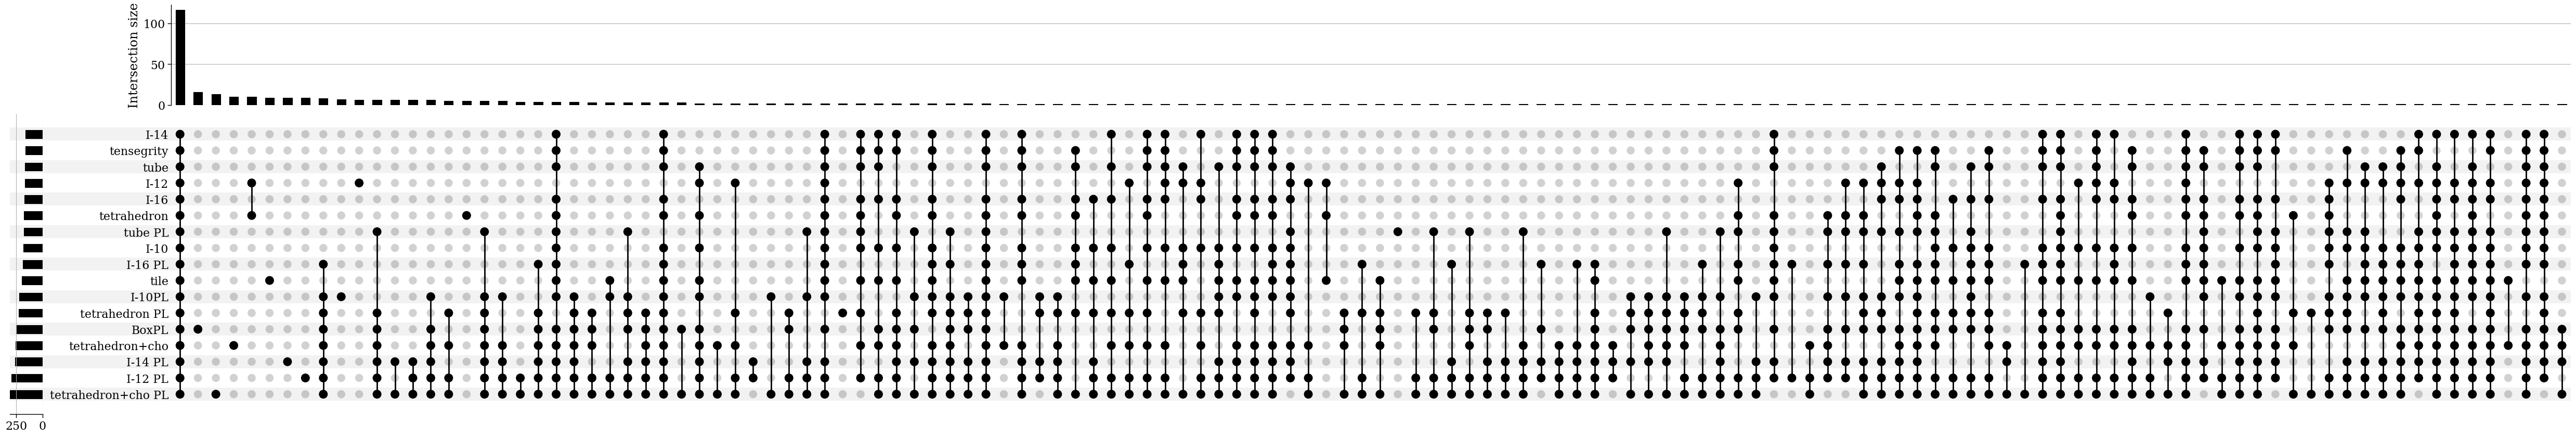

In [11]:
allPros = np.unique(overallRes3['Protein'])
listPros = np.unique(overallResPres['Sample'])
setNames = list()
listSets = list()
#for c in np.unique(overallRes3['Sample']):
#for c in ['tube','tile','tensegrity','I-12']:
#for c in ['tube','tile','tensegrity','I-12']:
for c in listPros:
    subRes = overallRes3[overallRes3['Sample'] == c]
    subRes = subRes[subRes['Present'] == 1]
    listSets.append(set(subRes['Protein']))
    setNames.append(c)

setNums=pd.DataFrame([[e in setA for setA in listSets] for e in allPros], columns = setNames)

df = pd.DataFrame([[e in setA for setA in listSets] for e in allPros], columns = setNames)
df=df.loc[:,listPros]
df_up = df.value_counts()
fig1=upsetplot.UpSet(df_up,sort_by ='cardinality', min_degree = 1)
#plot(fig1)
fig1.plot()

In [18]:
import itertools

In [24]:
from upsetplot import from_contents

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

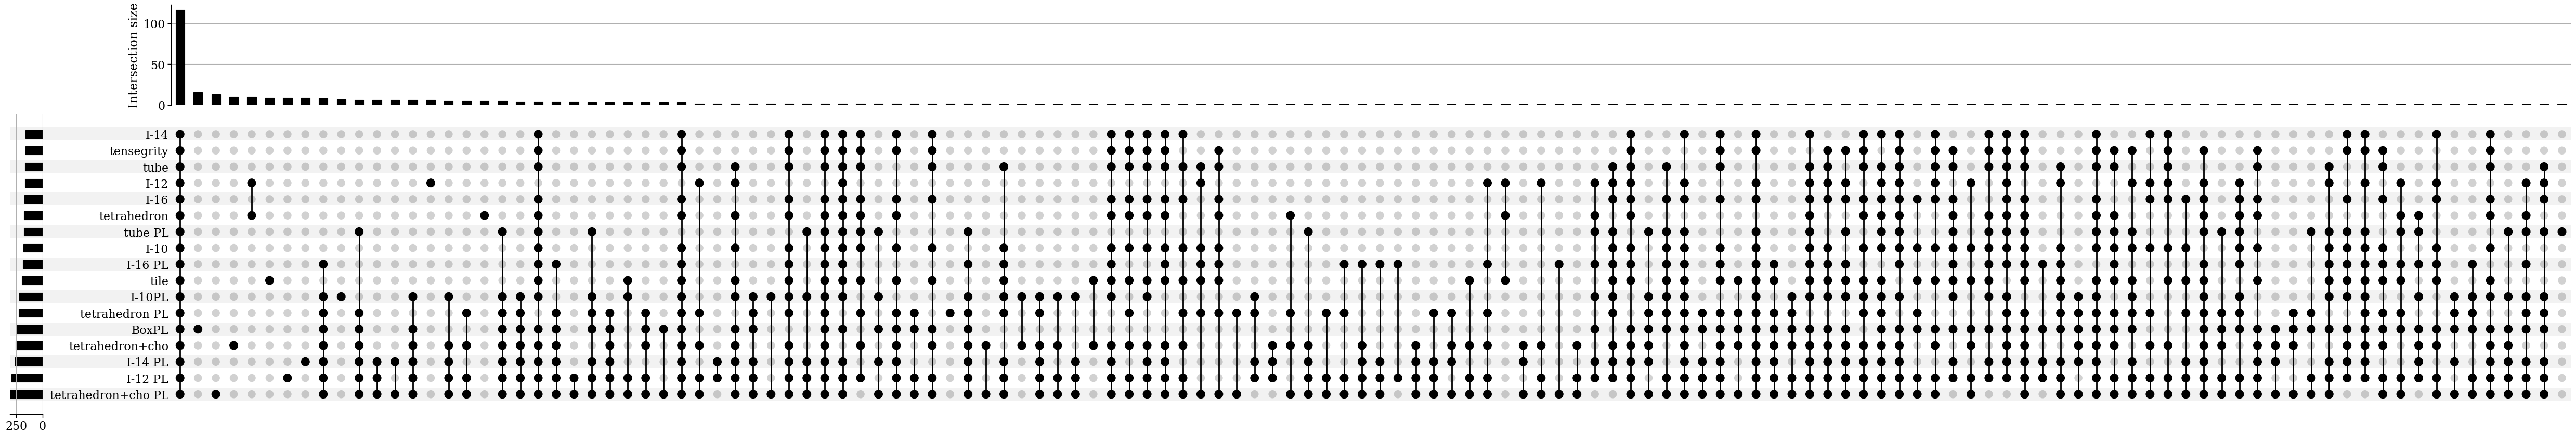

In [42]:
animals = from_contents({listPros[i]: listSets[i] for i in range(len(listSets))})
#animals = from_contents(
#    {"A": listSets[0], "B":  listSets[1], "C":  listSets[2]}
#)
upsetplot.UpSet(animals,sort_by ='cardinality', min_degree = 1).plot()

In [35]:
animals.keys()

dict_keys(['A0A075B6H7', 'A0A075B6I0', 'A0A075B6J9', 'A0A075B6K4', 'A0A075B6K5', 'A0A075B6P5', 'A0A075B6Q5', 'A0A075B6R2', 'A0A075B6R9', 'A0A075B6S2', 'A0A075B6S5', 'A0A075B6S6', 'A0A075B6S9', 'A0A087WSY4', 'A0A087WSY6', 'A0A087WSZ0', 'A0A087WW87'])

In [28]:
listSets[10]

{'A0A075B6H7',
 'A0A0A0MRZ8',
 'A0A0A0MS15',
 'A0A0B4J1V0',
 'A0A0B4J1V1',
 'A0A0C4DH25',
 'A0A0C4DH30',
 'A0A0C4DH35',
 'A0A0C4DH55',
 'A0A0G2JMI3',
 'A0A0J9YX35',
 'A0A0J9YXX1',
 'A0A8I5KQE6',
 'A6NHL2',
 'A6NMY6',
 'B2RXH8',
 'B7ZW38',
 'B9A064',
 'H0Y8K0',
 'O14556',
 'O14791',
 'O60812',
 'O60814',
 'O76027',
 'P00338',
 'P00450',
 'P00505',
 'P00734',
 'P00738',
 'P01008',
 'P01011',
 'P01591',
 'P01593',
 'P01594',
 'P01624',
 'P01717',
 'P01718',
 'P01772',
 'P01780',
 'P01782',
 'P01857',
 'P01859',
 'P01860',
 'P01877',
 'P02647',
 'P02649',
 'P02656',
 'P02741',
 'P02743',
 'P02749',
 'P02768',
 'P02787',
 'P02790',
 'P04040',
 'P04075',
 'P04217',
 'P04908',
 'P05062',
 'P05089',
 'P05090',
 'P06396',
 'P06576',
 'P06727',
 'P06733',
 'P06899',
 'P07339',
 'P07437',
 'P07737',
 'P07910',
 'P08603',
 'P08697',
 'P0CG04',
 'P0CG47',
 'P0CG48',
 'P0DMR1',
 'P0DOY2',
 'P0DOY3',
 'P0DP02',
 'P0DP03',
 'P10412',
 'P10809',
 'P11142',
 'P12259',
 'P12270',
 'P13639',
 'P13796',
 '

In [ ]:
for r in range(len(listPros)):
    itertools.combinations(listPros, r)

In [22]:
a=itertools.combinations(listPros, 2)

In [23]:
[' '.join(i) for i in a]

['BoxPL I-10',
 'BoxPL I-10PL',
 'BoxPL I-12',
 'BoxPL I-12 PL',
 'BoxPL I-14',
 'BoxPL I-14 PL',
 'BoxPL I-16',
 'BoxPL I-16 PL',
 'BoxPL tensegrity',
 'BoxPL tetrahedron',
 'BoxPL tetrahedron PL',
 'BoxPL tetrahedron+cho',
 'BoxPL tetrahedron+cho PL',
 'BoxPL tile',
 'BoxPL tube',
 'BoxPL tube PL',
 'I-10 I-10PL',
 'I-10 I-12',
 'I-10 I-12 PL',
 'I-10 I-14',
 'I-10 I-14 PL',
 'I-10 I-16',
 'I-10 I-16 PL',
 'I-10 tensegrity',
 'I-10 tetrahedron',
 'I-10 tetrahedron PL',
 'I-10 tetrahedron+cho',
 'I-10 tetrahedron+cho PL',
 'I-10 tile',
 'I-10 tube',
 'I-10 tube PL',
 'I-10PL I-12',
 'I-10PL I-12 PL',
 'I-10PL I-14',
 'I-10PL I-14 PL',
 'I-10PL I-16',
 'I-10PL I-16 PL',
 'I-10PL tensegrity',
 'I-10PL tetrahedron',
 'I-10PL tetrahedron PL',
 'I-10PL tetrahedron+cho',
 'I-10PL tetrahedron+cho PL',
 'I-10PL tile',
 'I-10PL tube',
 'I-10PL tube PL',
 'I-12 I-12 PL',
 'I-12 I-14',
 'I-12 I-14 PL',
 'I-12 I-16',
 'I-12 I-16 PL',
 'I-12 tensegrity',
 'I-12 tetrahedron',
 'I-12 tetrahedron PL'

In [15]:
setNums

,BoxPL,I-10,I-10PL,I-12,I-12 PL,I-14,I-14 PL,I-16,I-16 PL,tensegrity,tetrahedron,tetrahedron PL,tetrahedron+cho,tetrahedron+cho PL,tile,tube,tube PL
0,True,False,True,True,True,False,True,False,True,False,True,True,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,True,True,True,True,True,True,False,False,True,False,True,False,True
4,False,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
530,False,False,True,False,True,False,True,False,False,False,False,False,True,True,False,False,False
531,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
532,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
pd.DataFrame(df_up)

0
BoxPL I-10  I-10PL I-12  I-12 PL I-14  I-14 PL I-16  I-16 PL tensegrity tetrahedron tetrahedron PL tetrahedron+cho tetrahedron+cho PL tile  tube  tube PL     
False False False  False False   False False   False False   False      False       False          False           False              False False False    120
True  True  True   True  True    True  True    True  True    True       True        True           True            True               True  True  True     117
      False False  False False   False False   False False   False      False       False          False           False              False False False     16
False False False  False False   False False   False False   False      False       False          False           True               False False False     13
                                                                                                   True            False              False False False     10
...                                                                                                                                                        ...
True  False False  False True    False True    False False   False      False       True           False           True               False False False      1
                                       False   False False   False      False       True           True            True               False False True       1
False False False  False True    False True    False True    False      False       False          False           True               False False False      1
True  False False  False True    False False   False False   False      False       True           False           True               False False True       1
                         False   False True    False False   False      False       False          True            True               False False False      1

[135 rows x 1 columns]